# Exploração e análise de dados de crédito com SQL
*Esse notebook faz parte do curso SQL para análise de dados da EBAC*

## Os dados:

Os dados representam informações de clientes de um banco e contam com as seguintes colunas:


* idade = idade do cliente
* sexo = sexo do cliente (F ou M)
* dependentes = número de dependentes do cliente
* escolaridade = nível de escolaridade do cliente
* salário_anual = faixa salarial do cliente
* tipo_cartao = tipo de cartão do cliente
* qtd_produtos = quantidade de produtos comprados nos últimos 12 meses
* iteracoes_12m = quantidade de iterações/transações nos últimos 12 meses
* meses_inativo_12m = quantidade de meses que o cliente ficou inativo
* limite_credito = limite de crédito do cliente
* valor_transacoes_12m = valor das transações dos últimos 12 meses
* qtd_transacoes_12m = quantidade de transações nos últimos 12 meses


A tabela foi criada no **AWS Athena** junto com o **S3 Bucket** com uma versão dos dados disponibilizados em:
https://github.com/andre-marcos-perez/ebac-course-utils/tree/main/dataset

## Exploração de dados:

A primeira fase da análise é entender quais são so dados disponíveis em nossa matéria prima:

**Qual a quantidade de informações presentes na base de dados?**

**Query:** SELECT count(*) FROM credito

`Resposta: 2564 linhas`

**ps.:** A base de dados do link acima contém mais linhas do que a seleção utilizada, porém para fins de estudo a redução de dados para análise é mais interessante.

**Como são os dados**

**Query:** SELECT * FROM credito LIMIT 10;

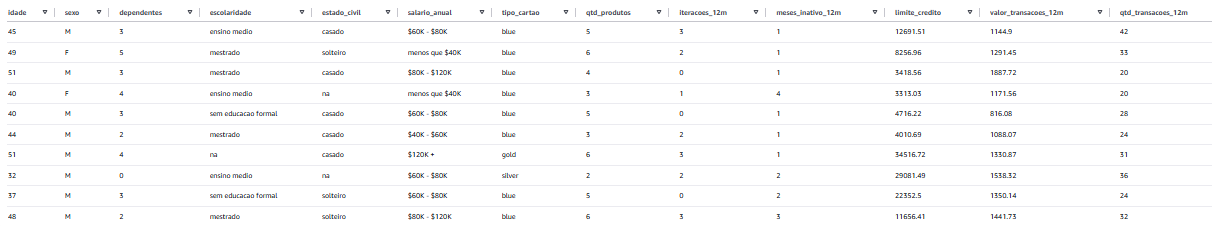

`É possível reparar que existem algumas informações nulas na tabela (valor na), vamos olhar mais de perto para os valores de cada colunas.`

**Quais os tipos de cada dado**

**Query:** DESCRIBE credito

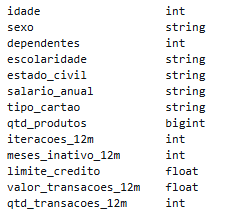

Agora que entendemos quais os tipos de dados, vamos olhar mais atentamente para as variáveis que não são numéricas.

**Quais são os níveis de escolaridade disponíveis no dataset**

**Query:** SELECT DISTINCT escolaridade FROM credito

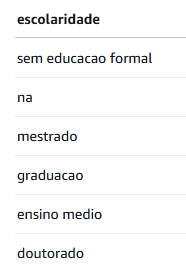

`Os dados contam com vários níveis de escolaridade e é possível perceber que existem valores núlos (na) no dataset, serão tratados mais tarde.`

**Quais são os tipos de estado_civil disponíveis no dataset**

**Query:** SELECT DISTINCT estado_civil FROM credito

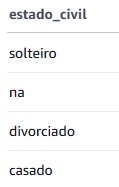

`Novamente existem valores núlos.`

**Quas são os tipos de salario_anual presentes no dataset**

**Query:** SELECT DISTINCT salario_anual FROM credito

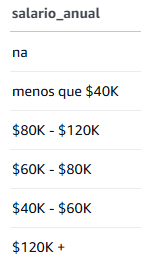

`Os salários nesse dataset não estão expostos com o valor exato que o cliente ganha. O que está informado é a faixa salarial de cada um. Contendo também valores nulos.`

**Quais são os tipos de cartão disponíveis no dataset**

**Query:** SELECT DISTINCT tipo_cartao FROM credito

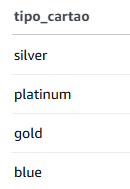

`Neste caso, não há necessidade de tratar valores nulos.`

## Análise de dados

Uma vez que exploramos os dados e buscamos entender quais são as informações que temos no nosso banco de dados, podemos analisar as informações para buscar entender o que está acontecendo no banco de dados. 

**Quantos clientes temos em cada faixa salarial?**

**Query:** SELECT COUNT(*) AS quantidade_faixa, salario_anual FROM credito GROUP BY salario_anual

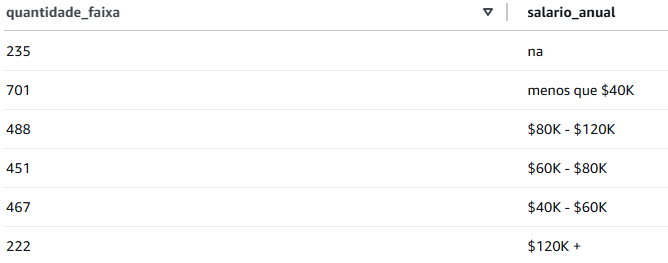

`A maioria dos clientes nesta base de dados possui uma renda menor que 40K e existem 235 clientes que não informaram ou não consta a faixa salarial. Clientes nesta faixa de mais baixa renda podem ser um foco da empresa.`

**Quantos clientes são homens, e quantos clientes são mulheres?**

**Query:** SELECT COUNT(*) AS qtd_sexo, sexo FROM credito GROUP BY sexo

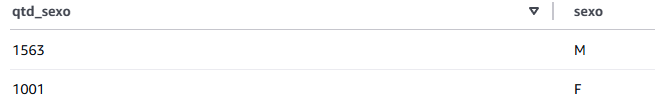

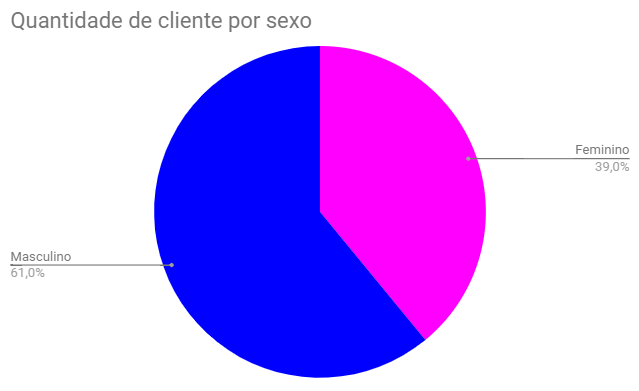

`A maioria dos clientes deste banco é homem. Para melhor visualização, foi criado um gráfico a partir do arquivo CSV gerado por esta query.`

**Buscando focar o marketing de maneira adequada, qual a idade dos clientes?**

**Query:** SELECT AVG(idade) AS media_idade, MIN(idade) AS min_idade, MAX(idade) AS max_idade, sexo FROM credito GROUP BY sexo

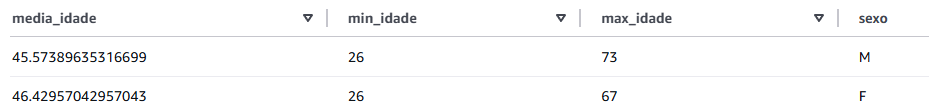

`Por meio desta análise não foi possível extrair nenhuma informação relevante. A menor idade dos dois sexos é a mesma e a média é similar. A única diferença é a idade máxima mas fato que é quase irrelevante por não ser uma diferença significativa.`

**Quais foram o maior e o menor valor de transação feito pelos clientes?**

**Query:** SELECT MIN(valor_transacoes_12m) AS transacao_minima, MAX(valor_transacoes_12m) AS transacao_maxima FROM credito

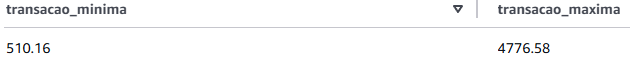

`Neste banco, as transações durante o ano vão de 510.16 à 5776.58.`

**Quais as caracterísiticas dos clientes que possuem os maiores créditos?**

**Query:** SELECT MAX(limite_credito) AS limite_credito, escolaridade, tipo_cartao, sexo FROM credito WHERE escolaridade != 'na' GROUP BY escolaridade, tipo_cartao, sexo ORDER BY limite_credito ASC

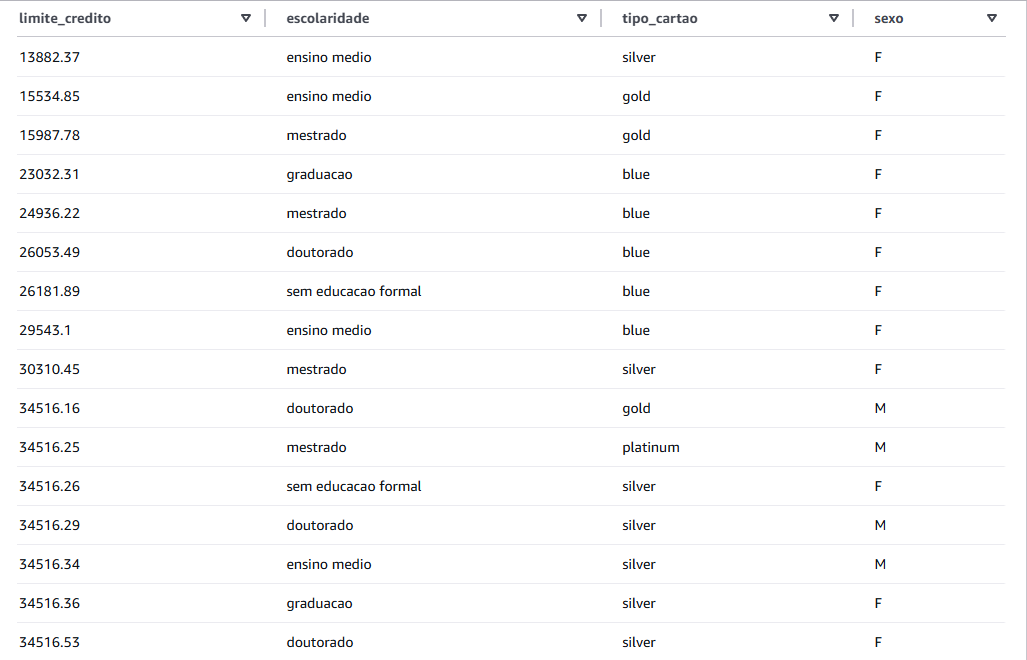

`Nota-se que não há clientes com cartão platinum dentre os menores limites. Também foi possível perceber que a maioria dos menores limites pertencem à mulheres enquanto os maiores limites pertencem predominantemente à homens.`

**Há diferença nos gastos entre homens e mulheres?**

**Query:** SELECT MAX(valor_transacoes_12m) AS maior_valor_gasto, AVG(valor_transacoes_12m) AS media_valor_gasto, MIN(valor_transacoes_12m) AS min_valor_gasto, sexo FROM credito GROUP BY sexo

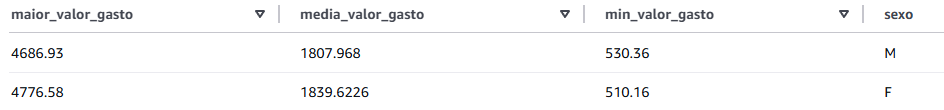

`Mesmo com a diference nos limites de crédito, os gastos entre homens e mulheres são similares.`

**O salário impacta no limite de crédito?**

**Query:** SELECT AVG(qtd_produtos) AS qtd_produtos, AVG(valor_transacoes_12m) AS media_valor_transacoes, AVG(limite_credito) AS media_limite, sexo, salario_anual FROM credito WHERE salario_anual != 'na' GROUP BY sexo, salario_anual ORDER BY AVG(valor_transacoes_12m) DESC

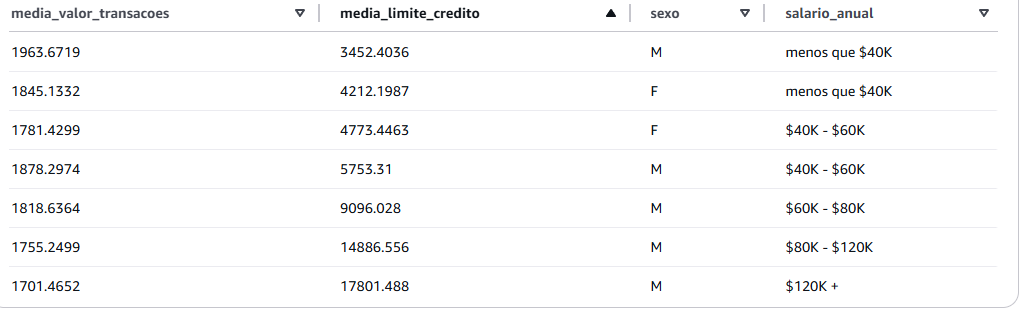

`Sim. Pessoas que fazem parte da menor faixa salarial possuem menor limite de crédito.`

**A quantidade de dependentes impacta no limite de crédito?**

**Query:** SELECT AVG(limite_credito) AS media_limite_credito, AVG(valor_transacoes_12m) AS media_valor_transacoes, dependentes FROM credito GROUP BY dependentes

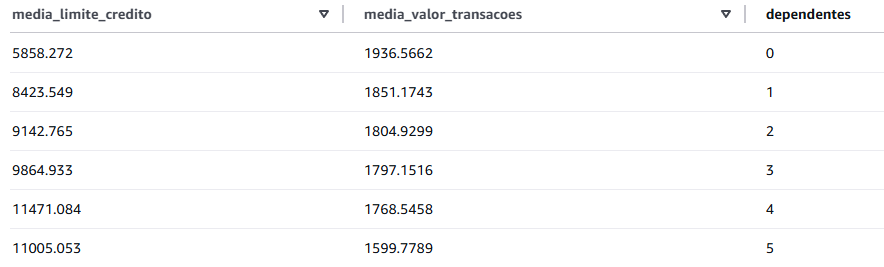

`De maneira geral, clientes do banco com mais dependentes tem maiores limites de crédito.`

**O tipo de cartão afeta a inatividade?**

**Query:** SELECT AVG(meses_inativo_12m) AS media_meses_inativo, MAX(meses_inativo_12m) AS max_meses_inativo, tipo_cartao FROM credito GROUP BY tipo_cartao 

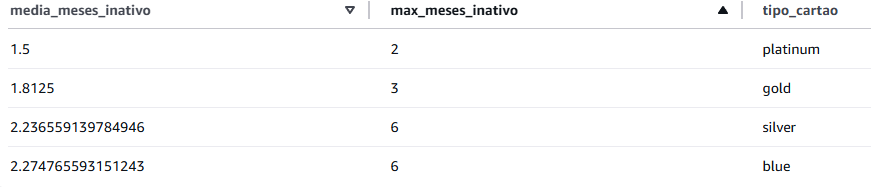

`Nota-se que os cartões blue e silver são os cartões que tem os maior média de tempo de inatividade. Seria interessante buscar oferecer ofertas e benefícios para clientes que possuem estes cartões afim de diminuir períodos de inatividade.`
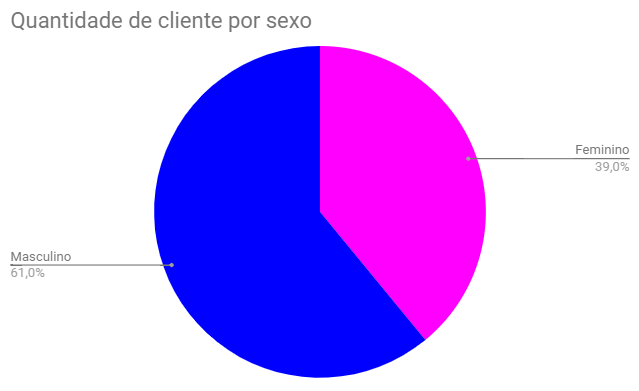

# Conclusão

Essas foram algumas análises extraídas do dataset de crédito.

Alguns insights alcançados por este projeto são:

* A maior parte dos clientes possui renda até 40K;
* A maior parte dos clientes é masculino;
* A escolaridade não parece influenciar no limite nem no tipo do cartão;
* Os clientes com maiores limites são em sua maioria homens;
* Os clientes com menores limites são em sua maioria mulheres;
* Dentre os emnores limites não há presença de cartão platinum;
* A faixa salarial impacta diretamente no limite de crédito;
* Não existem clientes com salário anual acima de 60K do sexo feminino;
* Clientes com maior número de dependentes tem tem média um limite de crédito maior;
* Clientes com os cartões blue e silver tem períodos de inatividade mais longos.